In [1]:
#%%capture
!pip install yfinance==0.2.58
#!pip install yfinance
#!pip install twelvedata
import numpy as np
import pandas as pd
import yfinance as yf
!pip show yfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.7/113.7 kB 2.1 MB/s eta 0:00:00
  Attempting uninstall: yfinance
    Found existing installation: yfinance 0.2.64
    Uninstalling yfinance-0.2.64:
      Successfully uninstalled yfinance-0.2.64
Name: yfinance
Version: 0.2.58
Summary: Download market data from Yahoo! Finance API
Home-page: https://github.com/ranaroussi/yfinance
Author: Ran Aroussi
Author-email: ran@aroussi.com
License: Apache
Location: /usr/local/lib/python3.11/dist-packages
Requires: beautifulsoup4, curl_cffi, frozendict, multitasking, numpy, pandas, peewee, platformdirs, pytz, requests
Required-by: 


In [2]:
ticker = "1010.SR"
data = yf.download(ticker, start="2022-01-01", end="2025-06-23")
data

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,1010.SR,1010.SR,1010.SR,1010.SR,1010.SR
Date,,,,,
2022-01-02,22.992546,23.378616,22.992546,23.249926,1439168
2022-01-03,23.378614,23.507304,23.078338,23.078338,3540055
2022-01-04,23.378614,23.507304,23.249925,23.507304,1880393
2022-01-05,23.678892,23.807581,23.378616,23.421512,2433931
2022-01-06,23.807579,24.022062,23.550200,23.721786,1938160
...,...,...,...,...,...
2025-06-16,27.350000,27.549999,27.049999,27.150000,2313030
2025-06-17,27.049999,27.549999,26.950001,27.299999,1713337


In [3]:
# Find the lowest price for the stock over the last week
data["prv_low_1"] = data["Low"].shift(1)
data["prv_low_2"] = data["Low"].shift(2)
data["prv_low_3"] = data["Low"].shift(3)
data["prv_low_4"] = data["Low"].shift(4)
data["prv_low_5"] = data["Low"].shift(5)
data["Low_Last_5d"] = data[["prv_low_1", "prv_low_2","prv_low_3","prv_low_4","prv_low_5"]].values.min(1)
data = data.drop(["prv_low_1", "prv_low_2", "prv_low_3", "prv_low_4", "prv_low_5"], axis=1)

# Find the highest price for the stock over the last week
data['prv_high_1'] = data["High"].shift(1)
data['prv_high_2'] = data["High"].shift(2)
data['prv_high_3'] = data["High"].shift(3)
data['prv_high_4'] = data["High"].shift(4)
data['prv_high_5'] = data["High"].shift(5)
data["High_Last_5d"] = data[["prv_high_1", "prv_high_2","prv_high_3","prv_high_4","prv_high_5"]].values.max(1)
data = data.drop(["prv_high_1", "prv_high_2", "prv_high_3", "prv_high_4", "prv_high_5"], axis=1)
data.tail(2)

Price,Close,High,Low,Open,Volume,Low_Last_5d,High_Last_5d
Ticker,1010.SR,1010.SR,1010.SR,1010.SR,1010.SR,,
Date,,,,,,,
2025-06-19,26.600000,26.650000,26.250000,26.40,2931037,26.35,27.950001
2025-06-22,26.950001,27.200001,26.450001,26.65,579139,26.25,27.549999


In [4]:
# Create boolean variable marking whether stock dropped at least six percent in the last week (five days)
data["six_percent_of_close_price"] = .94*data["Close"]
data["Close"] = 1*data["Close"]
data["six_percent_of_close_price_within_last_five_days"] = np.where((data['Low_Last_5d'] <= data['six_percent_of_close_price']) & (data['six_percent_of_close_price'] <= data['High_Last_5d']), True, False)

In [5]:
# Create boolean variable marking whether current close price is greater than yesterdays close price
data["Last_Close"] = data["Close"].shift(1)
data["close_diff"] = data["Close"].values.reshape(data.shape[0]) - data["Last_Close"].values.reshape(data.shape[0])
data["up_from_yesterday"] = np.where((data["close_diff"] > 0), True, False)
data.tail(5)

Price,Close,High,Low,Open,Volume,Low_Last_5d,High_Last_5d,six_percent_of_close_price,six_percent_of_close_price_within_last_five_days,Last_Close,close_diff,up_from_yesterday
Ticker,1010.SR,1010.SR,1010.SR,1010.SR,1010.SR,,,,,,,
Date,,,,,,,,,,,,
2025-06-16,27.350000,27.549999,27.049999,27.150000,2313030,26.799999,28.799999,25.709000,False,27.100000,0.250000,True
2025-06-17,27.049999,27.549999,26.950001,27.299999,1713337,26.799999,28.799999,25.426999,False,27.350000,-0.300001,False
2025-06-18,26.350000,27.049999,26.350000,26.750000,2101605,26.799999,28.799999,24.769000,False,27.049999,-0.699999,False
2025-06-19,26.600000,26.650000,26.250000,26.400000,2931037,26.350000,27.950001,25.004000,False,26.350000,0.250000,True
2025-06-22,26.950001,27.200001,26.450001,26.650000,579139,26.250000,27.549999,25.333001,False,26.600000,0.350000,True


In [6]:
# Buy stock if price dropped at least seven percent in last week and current close price is greater than yesterdays close price
data["shortsell"] = data["six_percent_of_close_price_within_last_five_days"] & data["up_from_yesterday"]
data["shortsellcumsum"] = data["shortsell"].cumsum().astype('int64')
data = data.drop(["Last_Close","close_diff","six_percent_of_close_price","up_from_yesterday","six_percent_of_close_price_within_last_five_days","Low_Last_5d","High_Last_5d"], axis=1)

# Add numerical columns of stocks current close price increased and decrease by one percent for final analysis
data["Close_up1%"] = 1.01*data["Close"]
data["Close_down1%"] = .99*data["Close"]
data.tail(10)

Price,Close,High,Low,Open,Volume,shortsell,shortsellcumsum,Close_up1%,Close_down1%
Ticker,1010.SR,1010.SR,1010.SR,1010.SR,1010.SR,,,,
Date,,,,,,,,,
2025-06-03,27.250000,27.700001,27.049999,27.500000,3285805,False,88,27.522500,26.977500
2025-06-04,27.850000,28.200001,27.250000,27.250000,3488662,False,88,28.128500,27.571500
2025-06-11,28.049999,28.799999,27.850000,28.450001,2820659,False,88,28.330499,27.769499
2025-06-12,27.750000,27.950001,27.450001,27.549999,1474341,False,88,28.027500,27.472500
2025-06-15,27.100000,27.299999,26.799999,27.000000,1382125,False,88,27.371000,26.829000
2025-06-16,27.350000,27.549999,27.049999,27.150000,2313030,False,88,27.623500,27.076500
2025-06-17,27.049999,27.549999,26.950001,27.299999,1713337,False,88,27.320499,26.779499
2025-06-18,26.350000,27.049999,26.350000,26.750000,2101605,False,88,26.613500,26.086500


In [7]:
# view dates where we buy the stock + the two days after
#buyclause = data['buy']==True
#view = data[buyclause.shift(2)|buyclause.shift()|buyclause]
#view

In [8]:
data.loc[(data.shortsell == False), 'Close_up1%'] = np.nan
data.loc[(data.shortsell == False), 'Close_down1%'] = np.nan
data.tail(10)

Price,Close,High,Low,Open,Volume,shortsell,shortsellcumsum,Close_up1%,Close_down1%
Ticker,1010.SR,1010.SR,1010.SR,1010.SR,1010.SR,,,,
Date,,,,,,,,,
2025-06-03,27.250000,27.700001,27.049999,27.500000,3285805,False,88,NaN,NaN
2025-06-04,27.850000,28.200001,27.250000,27.250000,3488662,False,88,NaN,NaN
2025-06-11,28.049999,28.799999,27.850000,28.450001,2820659,False,88,NaN,NaN
2025-06-12,27.750000,27.950001,27.450001,27.549999,1474341,False,88,NaN,NaN
2025-06-15,27.100000,27.299999,26.799999,27.000000,1382125,False,88,NaN,NaN
2025-06-16,27.350000,27.549999,27.049999,27.150000,2313030,False,88,NaN,NaN
2025-06-17,27.049999,27.549999,26.950001,27.299999,1713337,False,88,NaN,NaN
2025-06-18,26.350000,27.049999,26.350000,26.750000,2101605,False,88,NaN,NaN


In [9]:
data["Close_up1%"] = data["Close_up1%"].ffill()
data["Close_down1%"] = data["Close_down1%"].ffill()
data.tail(10)

Price,Close,High,Low,Open,Volume,shortsell,shortsellcumsum,Close_up1%,Close_down1%
Ticker,1010.SR,1010.SR,1010.SR,1010.SR,1010.SR,,,,
Date,,,,,,,,,
2025-06-03,27.250000,27.700001,27.049999,27.500000,3285805,False,88,31.107999,30.491999
2025-06-04,27.850000,28.200001,27.250000,27.250000,3488662,False,88,31.107999,30.491999
2025-06-11,28.049999,28.799999,27.850000,28.450001,2820659,False,88,31.107999,30.491999
2025-06-12,27.750000,27.950001,27.450001,27.549999,1474341,False,88,31.107999,30.491999
2025-06-15,27.100000,27.299999,26.799999,27.000000,1382125,False,88,31.107999,30.491999
2025-06-16,27.350000,27.549999,27.049999,27.150000,2313030,False,88,31.107999,30.491999
2025-06-17,27.049999,27.549999,26.950001,27.299999,1713337,False,88,31.107999,30.491999
2025-06-18,26.350000,27.049999,26.350000,26.750000,2101605,False,88,31.107999,30.491999


In [10]:
data["buyup"] = np.where((data["Close"].values.reshape(data.shape[0])-data["Close_up1%"].values.reshape(data.shape[0]) > 0),True,False)
data["buydown"] = np.where((data["Close_down1%"].values.reshape(data.shape[0])-data["Close"].values.reshape(data.shape[0]) > 0),True,False)
data["buy"] = data["buydown"]|data["buyup"]
data["buycumsum"] = data["buy"].cumsum().astype('int64')
#data.to_csv('out.csv', index=False)
#data = pd.read_csv('out.csv')
#data.tail(10)

In [13]:
data.to_csv("out.csv")
data = pd.read_csv("out.csv")
data.head(10)

,Price,Close,High,Low,Open,Volume,shortsell,shortsellcumsum,Close_up1%,Close_down1%,buyup,buydown,buy,buycumsum
0,Ticker,1010.SR,1010.SR,1010.SR,1010.SR,1010.SR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Date,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-01-02,22.99254608154297,23.378615617855004,22.99254608154297,23.249926317875403,1439168,False,0.0,NaN,NaN,False,False,False,0.0
3,2022-01-03,23.37861442565918,23.50730371907625,23.07833831677058,23.07833831677058,3540055,False,0.0,NaN,NaN,False,False,False,0.0
4,2022-01-04,23.37861442565918,23.50730371907625,23.249925132242108,23.50730371907625,1880393,False,0.0,NaN,NaN,False,False,False,0.0
5,2022-01-05,23.678892135620117,23.807581437738648,23.378616006428043,23.4215118950098,2433931,False,0.0,NaN,NaN,False,False,False,0.0
6,2022-01-06,23.807579040527344,24.02206173458615,23.550200462206018,23.721785635629203,1938160,False,0.0,NaN,NaN,False,False,False,0.0
7,2022-01-09,24.064960479736328,24.107858005471684,23.807581870817348,23.893375285914768,1634010,False,0.0,NaN,NaN,False,False,False,0.0
8,2022-01-10,24.408132553100586,24.536821849192652,24.10785643797031,24.10785643797031,3365323,False,0.0,NaN,NaN,False,False,False,0.0
9,2022-01-11,25.266061782836914,25.266061782836914,24.36523349423201,24.451026898342917,2723395,True,1.0,25.518722,25.013401,False,False,False,0.0


In [14]:
entry_exit_values = []
dates = []
for x in range(1,int(data["shortsellcumsum"].max())+1):
  frame = data.loc[data.shortsellcumsum==x]
  if (frame.loc[frame.buy==True].shape[0]>=1):
    ssclose = float(frame.loc[frame.shortsell==True]["Close"].to_list()[0])
    buyclose = float(frame.loc[frame.buy==True]["Close"].to_list()[0])
    entry_exit_values.append(ssclose-buyclose)
    dates.append(frame.loc[frame.buy==True]["Price"].to_list()[0])

In [15]:
entry_exit_values

[-0.9008274078369141,
 0.5147628784179688,
 0.3860740661621094,
 1.1153106689453125,
 0.38607025146484375,
 0.48691558837890625,
 2.434539794921875,
 0.8260078430175781,
 0.3477897644042969,
 0.5216865539550781,
 1.0868549346923828,
 0.30854034423828125,
 1.322336196899414,
 0.4848518371582031,
 0.7052478790283203,
 0.8815574645996094,
 0.6170883178710938,
 0.35262489318847656,
 1.2341804504394531,
 0.7660026550292969,
 0.8561229705810547,
 -0.40552711486816406,
 0.40552711486816406,
 1.0814189910888672,
 2.0727176666259766,
 0.7209434509277344,
 0.5857658386230469,
 0.7811355590820312,
 0.7351856231689453,
 0.3675956726074219,
 0.6432914733886719,
 1.056833267211914,
 0.5513916015625,
 0.4238147735595703,
 0.4860038757324219,
 0.38880157470703125,
 0.6804027557373047,
 0.6804027557373047,
 0.3402061462402344,
 0.7999992370605469,
 0.39999961853027344]

In [16]:
def cumlative_pnl(entry_exit_values):
  cumpnl = 0
  pnl = []
  for num in entry_exit_values:
    cumpnl += num
    pnl.append(cumpnl)
  return pnl
import datetime as dt
from datetime import datetime

pnl = cumlative_pnl(entry_exit_values=entry_exit_values)
#pnl = [diff*115 for diff in pnl]

date_objects = [dt.datetime.strptime(date, '%Y-%m-%d').date() for date in dates]

In [17]:
print(date_objects)
print(pnl)

[datetime.date(2022, 1, 30), datetime.date(2022, 2, 2), datetime.date(2022, 2, 20), datetime.date(2022, 2, 24), datetime.date(2022, 3, 28), datetime.date(2022, 4, 13), datetime.date(2022, 5, 10), datetime.date(2022, 5, 16), datetime.date(2022, 5, 26), datetime.date(2022, 5, 31), datetime.date(2022, 7, 25), datetime.date(2022, 10, 9), datetime.date(2022, 10, 26), datetime.date(2022, 11, 8), datetime.date(2022, 12, 18), datetime.date(2022, 12, 29), datetime.date(2023, 2, 14), datetime.date(2023, 2, 19), datetime.date(2023, 3, 14), datetime.date(2023, 3, 29), datetime.date(2023, 4, 10), datetime.date(2023, 5, 9), datetime.date(2023, 5, 14), datetime.date(2023, 5, 23), datetime.date(2023, 6, 8), datetime.date(2023, 6, 15), datetime.date(2023, 7, 19), datetime.date(2023, 11, 2), datetime.date(2023, 11, 9), datetime.date(2023, 12, 20), datetime.date(2024, 1, 17), datetime.date(2024, 1, 25), datetime.date(2024, 2, 14), datetime.date(2024, 7, 22), datetime.date(2024, 8, 27), datetime.date(2024

Text(0, 0.5, 'Cumulative PNL ($)')

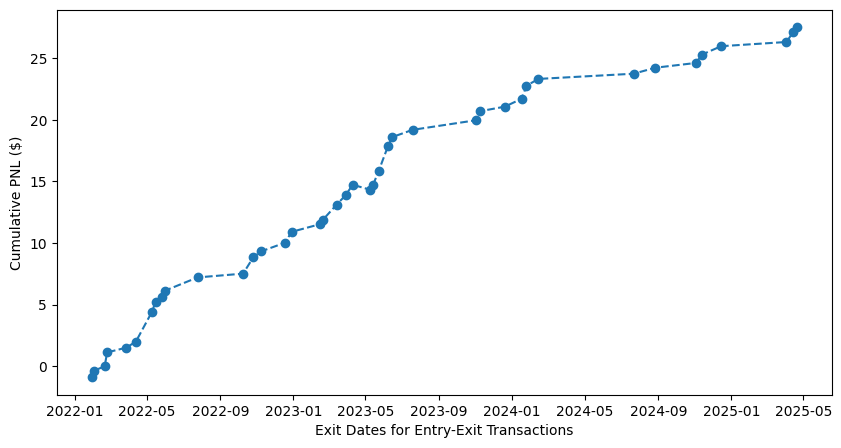

In [18]:
import matplotlib.pyplot as plt
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(5)
plt.plot(date_objects, pnl,marker='o', linestyle='dashed')
plt.xlabel('Exit Dates for Entry-Exit Transactions')
plt.ylabel('Cumulative PNL ($)')